In [6]:
library(ggplot2)
library(rbcb)
library(dplyr)

In [2]:
inflacao <- get_series(c(Inflacao = 433), start_date = "2003-01-01")
inflacao$Inflacao <- cumprod(1+inflacao$Inflacao/100)

In [3]:
div_liq <- get_series(c(Divi = 2053))
pc_div_liq <- get_series(c(DIV = 4503))

In [8]:
pib <- left_join(pc_div_liq, div_liq, by = c("date" = "date"))
pib$DIV <- pib$DIV/100
pib$pib <- (1/pib$DIV)*pib$Divi
pib <- left_join(inflacao, pib, by = c("date" = "date"))
pib$pib_def <- pib$pib/pib$Inflacao

In [9]:
var_pib_nom <- diff(pib$pib,12)/pib$pib[1:(nrow(pib)-12)]*100
var_pib_def <- diff(pib$pib_def,12)/pib$pib_def[1:(nrow(pib)-12)]*100
var_pib <- data.frame(date = pib$date[13:nrow(pib)],
                      Nominal = var_pib_nom/100,
                      Real = var_pib_def/100)

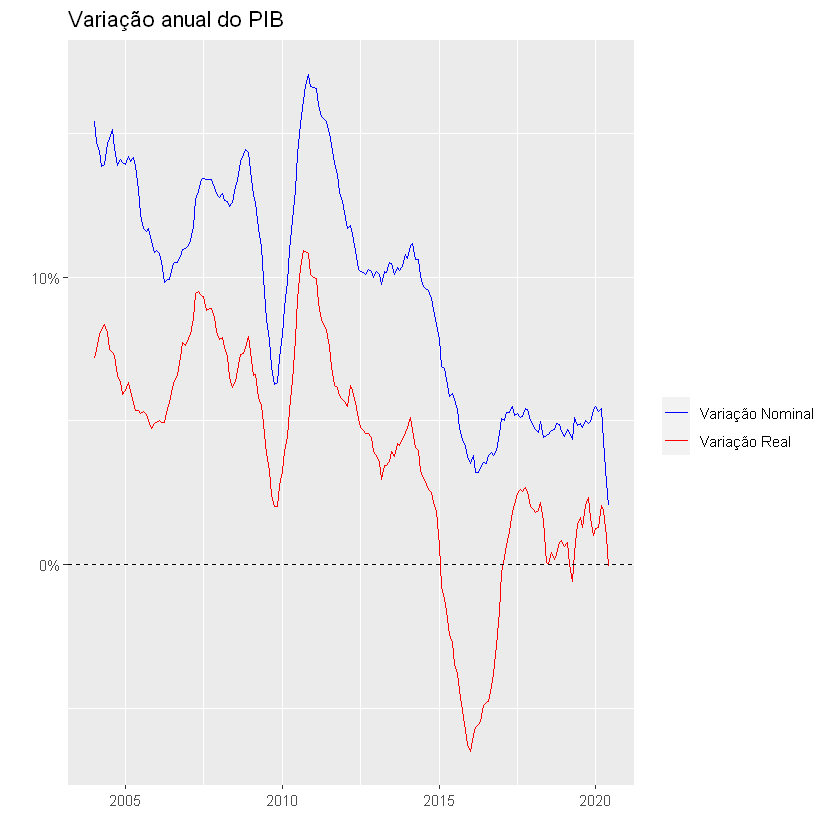

In [10]:
var_pib %>%
  ggplot(aes(x = date))+
  geom_line(aes(y = Nominal, col = "Variação Nominal"))+
  geom_line(aes(y = Real, col = "Variação Real"))+
  scale_colour_manual("",values = c("blue","red"))+
  labs(x = "", y = "", title = "Variação anual do PIB")+
  scale_y_continuous(labels = scales::percent)+
  geom_hline(yintercept = 0, lty = 2)